# Example 1

In [3]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator

# Construct quantum circuit without measurement
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
# Alternative simulator option
# simulator = AerSimulator(method = 'unitary')
qc = transpile(qc, simulator)

# Run the circuit and extract the unitary matrix
result = simulator.run(qc).result()
unitary = result.get_unitary(qc)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]


# Example 2

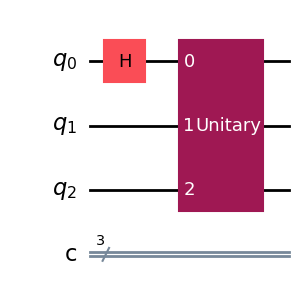

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

# Define the unitary operator for the quantum random walk
U_mat = np.zeros((8,8))

# Set the 'requsite' elements to 1
U_mat[0][2] = 1
U_mat[1][1] = 1
U_mat[2][4] = 1
U_mat[3][6] = 1 
U_mat[4][3] = 1
U_mat[5][7] = 1
U_mat[6][0] = 1
U_mat[7][5] = 1

# Define the unitary operator
U = Operator(U_mat)

# Construct and simulate a quantum circuit without measurement
qrw_circ = QuantumCircuit(3,3)

qrw_circ.h(0)
qrw_circ.unitary(U, range(3))
qrw_circ.draw('mpl')

In [9]:
qrw_circOp = Operator.from_circuit(qrw_circ)
qrw_circOp.draw("latex")

<IPython.core.display.Latex object>